
<table>
    <tr>
      <td>Grado en Ingeniería de Datos e Inteligencia Artificial - Facultad de Informática - UCM
      </td>
      <td>
      <img src="https://biblioteca.ucm.es/data/cont/media/www/pag-88746//escudo.jpg"  width=50/>
      </td>
     </tr>
</table>

## Adquisicion y preprocesamiento de datos
Material original por Rafael Caballero, adaptado y extendido por Pablo C. Cañizares
### Combinando dataframes
Veamos en este Notebook cómo se combinan y agregan dataframes

### Índice
[Concatenar](#Concatenar)<br>
[Merge](#Merge)<br>



El siguiente código es para mostrar una dataframe al lado de otro, ejecutarlo pero no hace falta entenderlo

In [48]:
from IPython.display import display, HTML
from IPython.display import display_html
from IPython.display import Markdown

def display_side_by_side(*args,title=""):
    print(title)
    html_str = ''
    for df in args:
        html_str += '&nbsp;&nbsp;&nbsp;'+df.to_html()
    display_html(
        html_str.replace('table','table style="display:inline"'), 
        raw=True)
    


<a name="Concatenar"></a>
### Concatenar

La forma más fácil, y a veces la más rápida y útil, de combinar dataframes, ya sea "pegándolo" debajo o al lado con `pd.concat`

<img src = "https://miro.medium.com/max/1050/1*0wu6DunCzPC4o9FIyRTW4w.png">

In [49]:
import IPython.display as display
import pandas as pd
from pandas import DataFrame
from random import sample


df1 = DataFrame({'clave': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                 'data': range(7),
                 'otro': sample(range(10, 30), 7)})

df2 = DataFrame({'clave': ['e', 'e', 'e', 'e'],
                 'data': range(4),
                 'otro': sample(range(10, 30), 4)})

display_side_by_side(df1,df2)

,clave,data,otro
0,b,0,11
1,b,1,19
2,a,2,18
3,c,3,20
4,a,4,12
5,a,5,16
6,b,6,27
,clave,data,otro
0,e,0,18
1,e,1,28


In [50]:
df3 = pd.concat([df1,df2])
df3

,clave,data,otro
0,b,0,11
1,b,1,19
2,a,2,18
3,c,3,20
4,a,4,12
5,a,5,16
6,b,6,27
0,e,0,18
1,e,1,28
2,e,2,12


Si nos incomoda que el índice no sea consecutivo:

In [51]:
df3 = df3.reset_index(drop=True)
df3

,clave,data,otro
0,b,0,11
1,b,1,19
2,a,2,18
3,c,3,20
4,a,4,12
5,a,5,16
6,b,6,27
7,e,0,18
8,e,1,28
9,e,2,12


Sin embargo, hay veces que es útil usar el índice (si no tiene ya otro cometido) para "apuntar" el origen de cada fila

In [52]:
import IPython.display as display
import pandas as pd

df1 = DataFrame({'clave': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                 'data': range(7),
                 'otro': sample(range(10, 30), 7)})

df2 = DataFrame({'clave': ['e', 'e', 'e', 'e'],
                 'data': range(4),
                 'otro': sample(range(10, 30), 4)})

df1.index = ["A"]*len(df1)
df2.index = ["B"]*len(df2)
display_side_by_side(df1,df2,pd.concat([df1,df2]),title="pd.concat([df1,df2])")

pd.concat([df1,df2])


,clave,data,otro
A,b,0,26
A,b,1,13
A,a,2,10
A,c,3,27
A,a,4,12
A,a,5,25
A,b,6,29
,clave,data,otro
B,e,0,14
B,e,1,15


**Ojo** porque `concat` no es tan *tonto* como parece; no se limita a pegar debajo sino que alinea por nombres de columna

In [53]:
import IPython.display as display
import pandas as pd

df1 = DataFrame({'clave': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                 'data': range(7),
                 'otro': sample(range(10, 30), 7)})

df2 = DataFrame({'clave': ['e', 'e', 'e', 'e'],                 
                 'otro': sample(range(10, 30), 4),
                 'data': range(4) } )

df1.index = ["A"]*len(df1)
df2.index = ["B"]*len(df2)
display_side_by_side(df1,df2,pd.concat([df1,df2]), title="pd.concat([df1,df2])")

pd.concat([df1,df2])


,clave,data,otro
A,b,0,12
A,b,1,28
A,a,2,10
A,c,3,21
A,a,4,29
A,a,5,25
A,b,6,19
,clave,otro,data
B,e,26,0
B,e,22,1


Con el parámetro axis (que por defecto vale 0) podemos hacer que en lugar de por filas concatene por columnas. En este caso lo lógico es que ambos dataframes tengan el mismo número de filas 



In [54]:
import numpy as np
filas = 5
df1 = DataFrame({'A': np.random.randint(1,10,filas) ,
                 'B': np.random.randint(1,10,filas),
                 'C': np.random.randint(1,10,filas)})

df2 = DataFrame({'D': np.random.randint(2000,3000,filas),
                 'E': np.random.randint(2000,3000,filas)})
display_side_by_side(df1,df2, pd.concat([df1,df2],axis=1),
                     title="pd.concat([df1,df2],axis=1)")    

pd.concat([df1,df2],axis=1)


A 
 B 
 C 
 
 
 
 
 0 
 1 
 7 
 5 
 
 
 1 
 3 
 2 
 8 
 
 
 2 
 5 
 4 
 3 
 
 
 3 
 2 
 8 
 8 
 
 
 4 
 4 
 6 
 5 
 
 
     
 
 
 
 D 
 E 
 
 
 
 
 0 
 2750 
 2598 
 
 
 1 
 2135 
 2810 
 
 
 2 
 2973 
 2516 
 
 
 3 
 2776 
 2482 
 
 
 4 
 2561 
 2362 
 
 
     
 
 
 
 A 
 B 
 C 
 D 
 E 
 
 
 
 
 0 
 1 
 7 
 5 
 2750 
 2598 
 
 
 1 
 3 
 2 
 8 
 2135 
 2810 
 
 
 2 
 5 
 4 
 3 
 2973 
 2516 
 
 
 3 
 2 
 8 
 8 
 2776 
 2482 
 
 
 4 
 4 
 6 
 5 
 2561 
 2362

Un aspecto muy importante: igual que al concatenar utiliza los nombres de columna aquí va a usar los números de fila 

In [55]:
df2.index=[0,1,2,4,7]
display_side_by_side(df1,df2, pd.concat([df1,df2],axis=1),
                     title="pd.concat([df1,df2],axis=1)")    

pd.concat([df1,df2],axis=1)


A 
 B 
 C 
 
 
 
 
 0 
 1 
 7 
 5 
 
 
 1 
 3 
 2 
 8 
 
 
 2 
 5 
 4 
 3 
 
 
 3 
 2 
 8 
 8 
 
 
 4 
 4 
 6 
 5 
 
 
     
 
 
 
 D 
 E 
 
 
 
 
 0 
 2750 
 2598 
 
 
 1 
 2135 
 2810 
 
 
 2 
 2973 
 2516 
 
 
 4 
 2776 
 2482 
 
 
 7 
 2561 
 2362 
 
 
     
 
 
 
 A 
 B 
 C 
 D 
 E 
 
 
 
 
 0 
 1.0 
 7.0 
 5.0 
 2750.0 
 2598.0 
 
 
 1 
 3.0 
 2.0 
 8.0 
 2135.0 
 2810.0 
 
 
 2 
 5.0 
 4.0 
 3.0 
 2973.0 
 2516.0 
 
 
 3 
 2.0 
 8.0 
 8.0 
 NaN 
 NaN 
 
 
 4 
 4.0 
 6.0 
 5.0 
 2776.0 
 2482.0 
 
 
 7 
 NaN 
 NaN 
 NaN 
 2561.0 
 2362.0

Si el número de filas o columnas no encaja, `concat` añadirá valores vacío para completar

In [56]:
import numpy as np
filas = 5
df1 = DataFrame({'A': np.random.randint(1,10,filas) ,
                 'B': np.random.randint(1,10,filas),
                 'C': np.random.randint(1,10,filas)})

df2 = DataFrame({'D': np.random.randint(2000,3000,filas-1),
                 'E': np.random.randint(2000,3000,filas-1)})
display_side_by_side(df1,df2, pd.concat([df1,df2],axis=1),title="pd.concat([df1,df2],axis=1)")    

display_side_by_side(df1,df2, pd.concat([df1,df2],axis=0),title="pd.concat([df1,df2],axis=0)")    

pd.concat([df1,df2],axis=1)


A 
 B 
 C 
 
 
 
 
 0 
 6 
 3 
 6 
 
 
 1 
 6 
 3 
 1 
 
 
 2 
 4 
 2 
 7 
 
 
 3 
 2 
 8 
 6 
 
 
 4 
 6 
 6 
 2 
 
 
     
 
 
 
 D 
 E 
 
 
 
 
 0 
 2137 
 2634 
 
 
 1 
 2110 
 2060 
 
 
 2 
 2518 
 2939 
 
 
 3 
 2002 
 2530 
 
 
     
 
 
 
 A 
 B 
 C 
 D 
 E 
 
 
 
 
 0 
 6 
 3 
 6 
 2137.0 
 2634.0 
 
 
 1 
 6 
 3 
 1 
 2110.0 
 2060.0 
 
 
 2 
 4 
 2 
 7 
 2518.0 
 2939.0 
 
 
 3 
 2 
 8 
 6 
 2002.0 
 2530.0 
 
 
 4 
 6 
 6 
 2 
 NaN 
 NaN

pd.concat([df1,df2],axis=0)


A 
 B 
 C 
 
 
 
 
 0 
 6 
 3 
 6 
 
 
 1 
 6 
 3 
 1 
 
 
 2 
 4 
 2 
 7 
 
 
 3 
 2 
 8 
 6 
 
 
 4 
 6 
 6 
 2 
 
 
     
 
 
 
 D 
 E 
 
 
 
 
 0 
 2137 
 2634 
 
 
 1 
 2110 
 2060 
 
 
 2 
 2518 
 2939 
 
 
 3 
 2002 
 2530 
 
 
     
 
 
 
 A 
 B 
 C 
 D 
 E 
 
 
 
 
 0 
 6.0 
 3.0 
 6.0 
 NaN 
 NaN 
 
 
 1 
 6.0 
 3.0 
 1.0 
 NaN 
 NaN 
 
 
 2 
 4.0 
 2.0 
 7.0 
 NaN 
 NaN 
 
 
 3 
 2.0 
 8.0 
 6.0 
 NaN 
 NaN 
 
 
 4 
 6.0 
 6.0 
 2.0 
 NaN 
 NaN 
 
 
 0 
 NaN 
 NaN 
 NaN 
 2137.0 
 2634.0 
 
 
 1 
 NaN 
 NaN 
 NaN 
 2110.0 
 2060.0 
 
 
 2 
 NaN 
 NaN 
 NaN 
 2518.0 
 2939.0 
 
 
 3 
 NaN 
 NaN 
 NaN 
 2002.0 
 2530.0

**Ejercicio**  El siguiente código descarga tres ficheros con datos diarios de metereología en Madrid y sus metadatos a una carpeta ./raw 

In [57]:
import requests
from pathlib import Path
path = Path.cwd()  
pathraw = Path(path,"raw")

pathraw.mkdir(exist_ok=True)

datos = ["https://datos.madrid.es/FWProjects/egob/Catalogo/MedioAmbiente/DatosMeteorologicos/Ficheros/Interpretaci%C3%B3n_datos_meteorologicos.pdf",
         "https://datos.madrid.es/egob/catalogo/300351-0-meteorologicos-diarios.csv",
         "https://datos.madrid.es/egob/catalogo/300351-3-meteorologicos-diarios.csv",
          "https://datos.madrid.es/egob/catalogo/300351-9-meteorologicos-diarios.csv"]
locales = []
for url in datos:
    nombre = Path(url).name
    camino = Path(pathraw,nombre)
    r = requests.get(url, allow_redirects=True) # el fichero queda en la variable r
    if r.status_code==200:
        with open(camino, 'wb') as f:
            f.write(r.content) # ahora lo grabamos localmente
        print("Grabado,",camino)
        locales.append(camino)
    else:
        print("Error descargando ",url)


Grabado, /Users/pablocc/SynologyDrive/Teaching/2024-2025/APD/apuntes/Tema 4 - Preprocesamiento/raw/Interpretaci%C3%B3n_datos_meteorologicos.pdf
Grabado, /Users/pablocc/SynologyDrive/Teaching/2024-2025/APD/apuntes/Tema 4 - Preprocesamiento/raw/300351-0-meteorologicos-diarios.csv
Grabado, /Users/pablocc/SynologyDrive/Teaching/2024-2025/APD/apuntes/Tema 4 - Preprocesamiento/raw/300351-3-meteorologicos-diarios.csv
Grabado, /Users/pablocc/SynologyDrive/Teaching/2024-2025/APD/apuntes/Tema 4 - Preprocesamiento/raw/300351-9-meteorologicos-diarios.csv


In [58]:
locales

[PosixPath('/Users/pablocc/SynologyDrive/Teaching/2024-2025/APD/apuntes/Tema 4 - Preprocesamiento/raw/Interpretaci%C3%B3n_datos_meteorologicos.pdf'),
 PosixPath('/Users/pablocc/SynologyDrive/Teaching/2024-2025/APD/apuntes/Tema 4 - Preprocesamiento/raw/300351-0-meteorologicos-diarios.csv'),
 PosixPath('/Users/pablocc/SynologyDrive/Teaching/2024-2025/APD/apuntes/Tema 4 - Preprocesamiento/raw/300351-3-meteorologicos-diarios.csv'),
 PosixPath('/Users/pablocc/SynologyDrive/Teaching/2024-2025/APD/apuntes/Tema 4 - Preprocesamiento/raw/300351-9-meteorologicos-diarios.csv')]

Añadir código para combinar los 3 ficheros en uno solo sabiendo que tienen las mismas columnas y que sus caminos están en la variable `locales`

In [60]:
df = pd.concat(dfs)
df

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,D01,V01,D02,...,D27,V27,D28,V28,D29,V29,D30,V30,D31,V31
0,28,79,102,81,28079102_81_98,2019,1,0.66,V,1.16,...,2.57,V,2.93,V,3.23,V,3.18,V,4.72,V
1,28,79,102,81,28079102_81_98,2019,2,4.32,V,2.98,...,1.36,V,0.97,V,0.00,N,0.00,N,0.00,N
2,28,79,102,81,28079102_81_98,2019,3,1.57,V,1.13,...,1.48,V,1.69,V,2.89,V,1.99,V,1.72,V
3,28,79,102,81,28079102_81_98,2019,4,1.32,V,1.21,...,1.00,V,1.82,V,1.97,V,1.84,V,0.00,N
4,28,79,102,81,28079102_81_98,2019,5,2.06,V,2.21,...,1.77,V,3.32,V,3.76,V,3.04,V,1.89,V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,28,79,59,89,28079059_89_98,2022,8,0.00,V,0.00,...,0.00,V,0.00,V,0.00,V,0.00,V,0.00,V
929,28,79,59,89,28079059_89_98,2022,9,0.00,V,0.00,...,0.00,V,0.00,V,0.30,V,0.00,V,0.00,N
930,28,79,59,89,28079059_89_98,2022,10,0.00,V,0.00,...,0.00,V,0.00,V,0.00,V,0.00,V,1.90,V
931,28,79,59,89,28079059_89_98,2022,11,0.00,V,0.00,...,0.00,V,3.40,V,0.00,V,0.00,V,0.00,N


In [61]:
df.MAGNITUD.unique()


array([81, 82, 83, 86, 87, 88, 89, 80])

<a name="Merge"></a>
### Merge

En este caso se busca unir dos dataframes fijándonos en las coincidencias entre valores de dos columnas

In [62]:
from pandas import DataFrame
from pandas import Series
import pandas as pd
from random import sample
df1 = DataFrame({'clave': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                 'data1': range(7),
                 'otro': sample(range(10, 30), 7)})

df2 = DataFrame({'clave': ['a', 'b', 'b', 'd'],
                 'data2': range(4)})
display_side_by_side(df1,df2)

clave 
 data1 
 otro 
 
 
 
 
 0 
 b 
 0 
 21 
 
 
 1 
 b 
 1 
 12 
 
 
 2 
 a 
 2 
 26 
 
 
 3 
 c 
 3 
 15 
 
 
 4 
 a 
 4 
 28 
 
 
 5 
 a 
 5 
 22 
 
 
 6 
 b 
 6 
 20 
 
 
     
 
 
 
 clave 
 data2 
 
 
 
 
 0 
 a 
 0 
 
 
 1 
 b 
 1 
 
 
 2 
 b 
 2 
 
 
 3 
 d 
 3

Por defecto la mezcla es por la columna que se llama igual 


In [63]:

display_side_by_side(df1,df2, pd.merge(df1,df2),title="pd.merge(df1,df2)")    


pd.merge(df1,df2)


clave 
 data1 
 otro 
 
 
 
 
 0 
 b 
 0 
 21 
 
 
 1 
 b 
 1 
 12 
 
 
 2 
 a 
 2 
 26 
 
 
 3 
 c 
 3 
 15 
 
 
 4 
 a 
 4 
 28 
 
 
 5 
 a 
 5 
 22 
 
 
 6 
 b 
 6 
 20 
 
 
     
 
 
 
 clave 
 data2 
 
 
 
 
 0 
 a 
 0 
 
 
 1 
 b 
 1 
 
 
 2 
 b 
 2 
 
 
 3 
 d 
 3 
 
 
     
 
 
 
 clave 
 data1 
 otro 
 data2 
 
 
 
 
 0 
 b 
 0 
 21 
 1 
 
 
 1 
 b 
 0 
 21 
 2 
 
 
 2 
 b 
 1 
 12 
 1 
 
 
 3 
 b 
 1 
 12 
 2 
 
 
 4 
 a 
 2 
 26 
 0 
 
 
 5 
 a 
 4 
 28 
 0 
 
 
 6 
 a 
 5 
 22 
 0 
 
 
 7 
 b 
 6 
 20 
 1 
 
 
 8 
 b 
 6 
 20 
 2

Si no se indica lo contrario, `merge` busca columnas comunes y hace un (inner) 'join'. Nótese que en este caso no se tienen en cuenta los índices
<br><br>

El método merge se puede llamar también dentro de un dataframe (es equivalente)

In [64]:
df1.merge(df2)

,clave,data1,otro,data2
0,b,0,21,1
1,b,0,21,2
2,b,1,12,1
3,b,1,12,2
4,a,2,26,0
5,a,4,28,0
6,a,5,22,0
7,b,6,20,1
8,b,6,20,2


También se pueden unir por varias columnas, que podemos especificar directamente con los parámetros `left_on`y `right_on`

In [65]:

df3 = df1.merge(df2, left_on=['clave','data1'], right_on = ['clave','data2'])

display_side_by_side(df1,df2, df3)    

clave 
 data1 
 otro 
 
 
 
 
 0 
 b 
 0 
 21 
 
 
 1 
 b 
 1 
 12 
 
 
 2 
 a 
 2 
 26 
 
 
 3 
 c 
 3 
 15 
 
 
 4 
 a 
 4 
 28 
 
 
 5 
 a 
 5 
 22 
 
 
 6 
 b 
 6 
 20 
 
 
     
 
 
 
 clave 
 data2 
 
 
 
 
 0 
 a 
 0 
 
 
 1 
 b 
 1 
 
 
 2 
 b 
 2 
 
 
 3 
 d 
 3 
 
 
     
 
 
 
 clave 
 data1 
 otro 
 data2 
 
 
 
 
 0 
 b 
 1 
 12 
 1

Si la clave o claves por las que querenos unir se llaman ambas igual podemos usar simplemente `on`

In [66]:
df3 = pd.merge(df1,df2,on='clave')
display_side_by_side(df1,df2, df3)   

clave 
 data1 
 otro 
 
 
 
 
 0 
 b 
 0 
 21 
 
 
 1 
 b 
 1 
 12 
 
 
 2 
 a 
 2 
 26 
 
 
 3 
 c 
 3 
 15 
 
 
 4 
 a 
 4 
 28 
 
 
 5 
 a 
 5 
 22 
 
 
 6 
 b 
 6 
 20 
 
 
     
 
 
 
 clave 
 data2 
 
 
 
 
 0 
 a 
 0 
 
 
 1 
 b 
 1 
 
 
 2 
 b 
 2 
 
 
 3 
 d 
 3 
 
 
     
 
 
 
 clave 
 data1 
 otro 
 data2 
 
 
 
 
 0 
 b 
 0 
 21 
 1 
 
 
 1 
 b 
 0 
 21 
 2 
 
 
 2 
 b 
 1 
 12 
 1 
 
 
 3 
 b 
 1 
 12 
 2 
 
 
 4 
 a 
 2 
 26 
 0 
 
 
 5 
 a 
 4 
 28 
 0 
 
 
 6 
 a 
 5 
 22 
 0 
 
 
 7 
 b 
 6 
 20 
 1 
 
 
 8 
 b 
 6 
 20 
 2

Además de *inner* join, se pueden hacer con el parámetro `how` tomando valores *left*, *right*, *outer*, *inner*

<img src="https://www.golinuxcloud.com/wp-content/uploads/types_joins-1320x961.png">

| Tipo de Join       | Ejemplo de Código                                                            | Descripción                                                                                                                |
|--------------------|-----------------------------------------------------------------|---------------------------------------------------|
| **Inner Join**     | `pd.merge(df1, df2, on='key', how='inner')`                     | Retorna solo las filas cuyos valores en la columna *key* coinciden en ambos DataFrames.                                         |
| **Left Join**      | `pd.merge(df1, df2, on='key', how='left')`                      | Retorna todas las filas del DataFrame izquierdo, incorporando los valores coincidentes del derecho y asignando NaN donde no haya match.  |
| **Right Join**     | `pd.merge(df1, df2, on='key', how='right')`                   | Retorna todas las filas del DataFrame derecho, incorporando los valores coincidentes del izquierdo y asignando NaN donde no haya match. |
| **Full Outer Join**| `pd.merge(df1, df2, on='key', how='outer')`                 | Retorna todas las filas de ambos DataFrames, combinando los registros coincidentes y asignando NaN en las posiciones sin match.  |

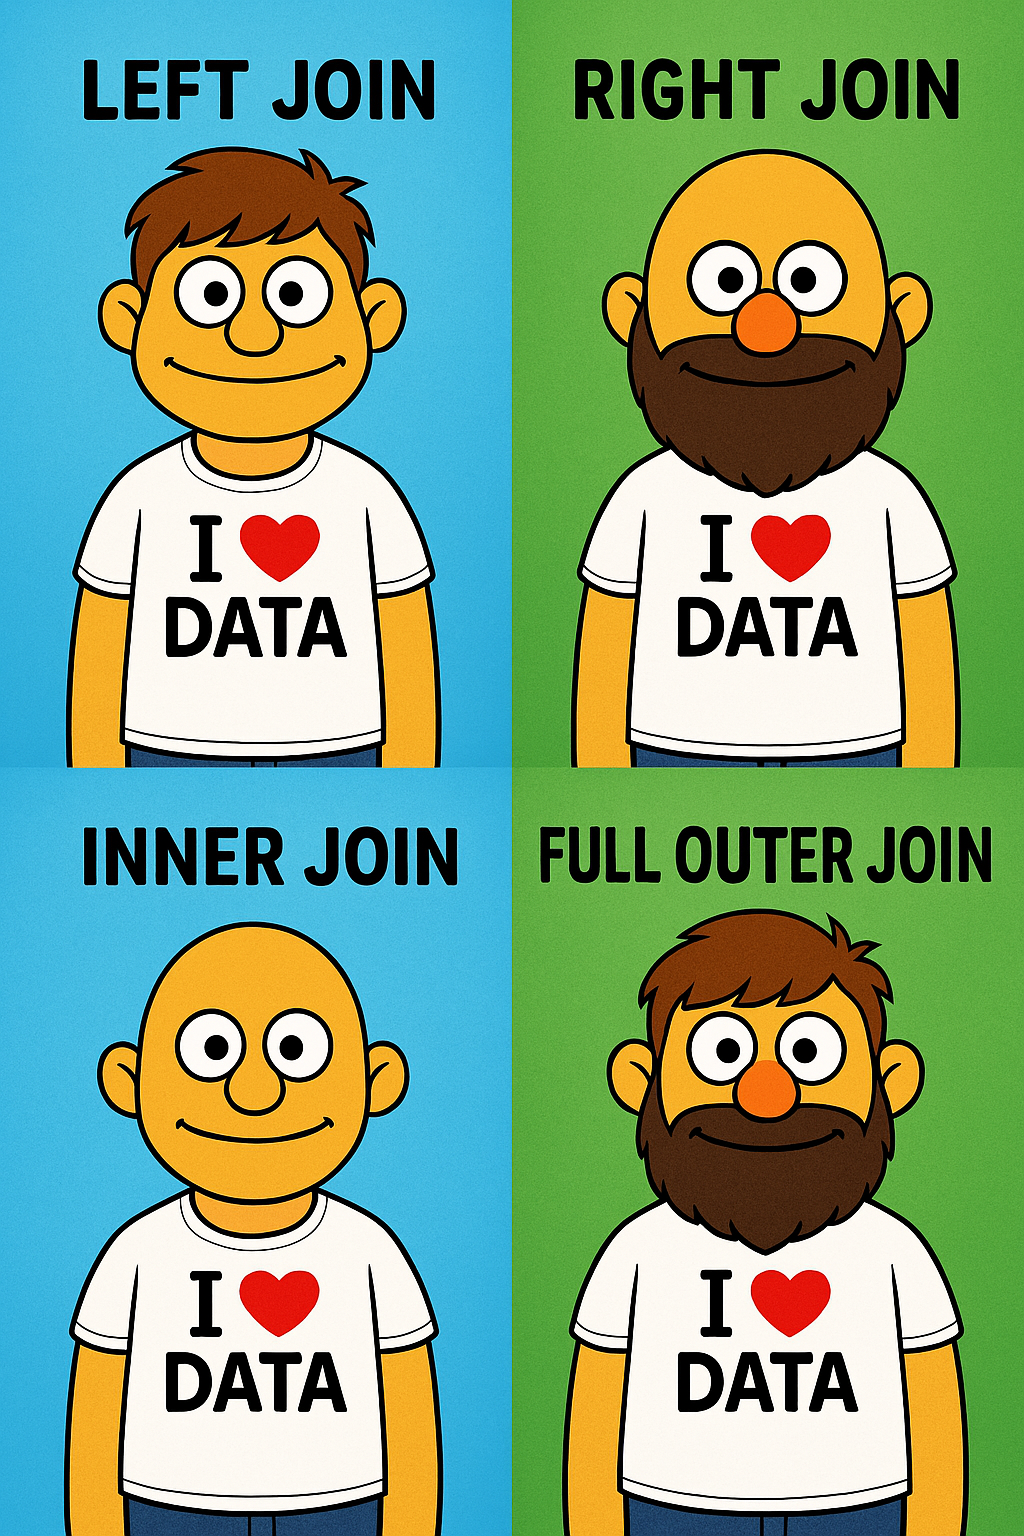

En el caso de left, right y full/outer si la columna no encaja se rellenan con valores NaN

In [67]:
df3 = df1.merge( df2, on='clave', how='left')
display_side_by_side(df1,df2, df3) 

clave 
 data1 
 otro 
 
 
 
 
 0 
 b 
 0 
 21 
 
 
 1 
 b 
 1 
 12 
 
 
 2 
 a 
 2 
 26 
 
 
 3 
 c 
 3 
 15 
 
 
 4 
 a 
 4 
 28 
 
 
 5 
 a 
 5 
 22 
 
 
 6 
 b 
 6 
 20 
 
 
     
 
 
 
 clave 
 data2 
 
 
 
 
 0 
 a 
 0 
 
 
 1 
 b 
 1 
 
 
 2 
 b 
 2 
 
 
 3 
 d 
 3 
 
 
     
 
 
 
 clave 
 data1 
 otro 
 data2 
 
 
 
 
 0 
 b 
 0 
 21 
 1.0 
 
 
 1 
 b 
 0 
 21 
 2.0 
 
 
 2 
 b 
 1 
 12 
 1.0 
 
 
 3 
 b 
 1 
 12 
 2.0 
 
 
 4 
 a 
 2 
 26 
 0.0 
 
 
 5 
 c 
 3 
 15 
 NaN 
 
 
 6 
 a 
 4 
 28 
 0.0 
 
 
 7 
 a 
 5 
 22 
 0.0 
 
 
 8 
 b 
 6 
 20 
 1.0 
 
 
 9 
 b 
 6 
 20 
 2.0

In [68]:
df3 = df1.merge( df2, on='clave', how='right')
display_side_by_side(df1,df2, df3) 

clave 
 data1 
 otro 
 
 
 
 
 0 
 b 
 0 
 21 
 
 
 1 
 b 
 1 
 12 
 
 
 2 
 a 
 2 
 26 
 
 
 3 
 c 
 3 
 15 
 
 
 4 
 a 
 4 
 28 
 
 
 5 
 a 
 5 
 22 
 
 
 6 
 b 
 6 
 20 
 
 
     
 
 
 
 clave 
 data2 
 
 
 
 
 0 
 a 
 0 
 
 
 1 
 b 
 1 
 
 
 2 
 b 
 2 
 
 
 3 
 d 
 3 
 
 
     
 
 
 
 clave 
 data1 
 otro 
 data2 
 
 
 
 
 0 
 a 
 2.0 
 26.0 
 0 
 
 
 1 
 a 
 4.0 
 28.0 
 0 
 
 
 2 
 a 
 5.0 
 22.0 
 0 
 
 
 3 
 b 
 0.0 
 21.0 
 1 
 
 
 4 
 b 
 1.0 
 12.0 
 1 
 
 
 5 
 b 
 6.0 
 20.0 
 1 
 
 
 6 
 b 
 0.0 
 21.0 
 2 
 
 
 7 
 b 
 1.0 
 12.0 
 2 
 
 
 8 
 b 
 6.0 
 20.0 
 2 
 
 
 9 
 d 
 NaN 
 NaN 
 3

**Ejercicio 1** En

https://raw.githubusercontent.com/RafaelCaballero/tdm/master/datos/tweetsCompletadoOrdenRename.csv

Tenemos datos de tweets, incluyendo el identificador del usuario que que ha emitidos cada tweet,  `userid`.

En 

https://raw.githubusercontent.com/RafaelCaballero/tdm/master/datos/usersrentaf.csv

tenemos datos de usuarios: sú número de seguidores, la renta de la zona donde viven, etc. En este caso el identificador se llama simplemente `id`.

Queremos unir ambos ficheros, de forma que a cada tweet se le añadan los datos de su usuario. Si un tweet no tiene su usario en el segundo conjunto de datos debemos borrarlo. Igualmente si un usuario no tiene ningún tweet no se incluirá.





In [46]:
import pandas as pd
url_tweets = "https://raw.githubusercontent.com/RafaelCaballero/tdm/master/datos/tweetsCompletadoOrdenRename.csv"
url_users = "https://raw.githubusercontent.com/RafaelCaballero/tdm/master/datos/usersrentaf.csv"
df_tweets = pd.read_csv(url_tweets)
df_users = pd.read_csv(url_users)



In [47]:
df_tweets.columns

Index(['userid', '_id', 'screen_name', 'text', 'hora', 'foto/vídeo', 'foto',
       'video', ''¡'', ''!'', ''¿'', ''?'', 'menciones', 'hashtags', 'URLs',
       'emojis', 'sentimiento medio emojis', 'palabras',
       'proporción palabras correctas', 'longitud media palabras',
       'mayúsculas', 'números', 'palabras vacías', 'adjetivos', 'sustantivos',
       'verbos', 'tiempo pasado', 'tiempo presente', 'tiempo futuro',
       'tiempo imperfecto', 'tiempo condicional', 'modo imperativo',
       'modo indicativo', 'modo subjuntivo', 'primera persona',
       'segunda persona', 'tercera persona', 'singular', 'plural',
       'infinitivo', 'gerundio', 'participio', 'estoy en'],
      dtype='object')

In [69]:
df_users.columns

Index(['id', 'screen_name', 'name', 'followers', 'created_at', 'friends_count',
       'location', 'ntweets', 'verified', 'nTotal', 'tweets', 'localidad',
       'provincia', 'distrito', 'seccion', 'cambio1518', 'mediana',
       'rentapaismin', 'rentapaismax', 'rentacommin', 'rentacommax'],
      dtype='object')

Index(['userid', '_id', 'screen_name_x', 'text', 'hora', 'foto/vídeo', 'foto',
       'video', ''¡'', ''!'', ''¿'', ''?'', 'menciones', 'hashtags', 'URLs',
       'emojis', 'sentimiento medio emojis', 'palabras',
       'proporción palabras correctas', 'longitud media palabras',
       'mayúsculas', 'números', 'palabras vacías', 'adjetivos', 'sustantivos',
       'verbos', 'tiempo pasado', 'tiempo presente', 'tiempo futuro',
       'tiempo imperfecto', 'tiempo condicional', 'modo imperativo',
       'modo indicativo', 'modo subjuntivo', 'primera persona',
       'segunda persona', 'tercera persona', 'singular', 'plural',
       'infinitivo', 'gerundio', 'participio', 'estoy en', 'id',
       'screen_name_y', 'name', 'followers', 'created_at', 'friends_count',
       'location', 'ntweets', 'verified', 'nTotal', 'tweets', 'localidad',
       'provincia', 'distrito', 'seccion', 'cambio1518', 'mediana',
       'rentapaismin', 'rentapaismax', 'rentacommin', 'rentacommax'],
      dtype='obje

,userid,_id,screen_name_x,text,hora,foto/vídeo,foto,video,'¡','!',...,localidad,provincia,distrito,seccion,cambio1518,mediana,rentapaismin,rentapaismax,rentacommin,rentacommax
0,372826254,1491110664240533504,heryartes,Dios siempre da por donde más le duele a uno. ...,18,0,0,0,0,0,...,Soto del Real,Madrid,01,1,9,17850.0,71,76,46,50
1,372826254,1491116058916184065,heryartes,Acaba de publicar un video en Telemicro https:...,18,1,0,1,0,0,...,Soto del Real,Madrid,01,1,9,17850.0,71,76,46,50
2,372826254,1491121778416136202,heryartes,Acaba de publicar un video https://t.co/wAwqtD...,18,1,0,1,0,0,...,Soto del Real,Madrid,01,1,9,17850.0,71,76,46,50
3,372826254,1448291132463587337,heryartes,Yo tenia varios días sin escuchar una emisora ...,14,0,0,0,0,3,...,Soto del Real,Madrid,01,1,9,17850.0,71,76,46,50
4,372826254,1448294476733112321,heryartes,"Facebook lleno de puyas e indirectas, Twitter ...",14,0,0,0,1,1,...,Soto del Real,Madrid,01,1,9,17850.0,71,76,46,50


**Ejercicio 2**. Parece que vuestro trabajo para las *artes marciales mixtas* no termina aún. Vamos a intentar trabajar con las estadísticas que generamos en la práctica de hace unas semanas. Pero esta vez los datos los tenemos en dos datasets diferentes: *ufc_info* y *ufc_stats*. Empezamos cargándolos:

In [90]:
import pandas as pd
import requests, zipfile, io

#Obtenemos un dataset de datos de UFC de:
url = "https://raw.githubusercontent.com/PabloCCanizares/data/main/ufc_data_joins.zip"
response = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(response.content))

dfs_dict = {}
file_list = z.namelist()

#Cargamos los valores
for file_name in file_list:
    if file_name.endswith('.csv'):
        # Intentamos leer el CSV con la codificación por defecto (utf-8)
        with z.open(file_name) as file_handle:
            df = pd.read_csv(file_handle, encoding='latin1')
        dfs_dict[file_name] = df

#Extraemos los DataFrames de información y estadísticas
df_info = dfs_dict["ufc_info.csv"]
df_stats = dfs_dict["ufc_stats.csv"]

print("DataFrame ufc_info.csv:")
print(df_info.head(), "\n")

print("DataFrame ufc_stats.csv:")
print(df_stats.head())


DataFrame ufc_info.csv:
                NAME         RECORD     NICKNAME HEIGHT    WEIGHT REACH  \
0   Magomed Ankalaev  21-1-1 (1 NC)          NaN  6' 3"  205 lbs.   75"   
1       Tom Aspinall         15-3-0          NaN  6' 5"  256 lbs.   78"   
2  Dricus Du Plessis         23-2-0  Stillknocks  6' 1"  185 lbs.   76"   
3  Merab Dvalishvili         19-4-0  The Machine  5' 6"  135 lbs.   68"   
4          Jon Jones  28-1-0 (1 NC)        Bones  6' 4"  248 lbs.   84"   

     STANCE           DOB  
0  Orthodox  Jun 02, 1992  
1  Orthodox  Apr 11, 1993  
2    Switch  Jan 14, 1994  
3  Orthodox  Jan 10, 1991  
4  Orthodox  Jul 19, 1987   

DataFrame ufc_stats.csv:
   Unnamed: 0                 NAME  SLpM Str. Acc.  SApM Str. Def.  TD Avg.  \
0           0     Magomed Ankalaev  3.66       52%  2.46       57%     0.80   
1           1         tom aspinall  8.07       67%  2.89       65%     3.27   
2           2   Dricus Du Plessis   6.12       48%  4.90       54%     2.55   
3           3 

Haz los 4 merge joins con los datasets obtenidos y explora las diferencias.